In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print("Number of train in imdb database:", train_data.shape)
print("Number of test in imdb database:", test_data.shape)

Number of train in imdb database: (25000,)
Number of test in imdb database: (25000,)


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

In [7]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [8]:
from sklearn.model_selection import train_test_split
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.6)
print(x_validation.shape, y_validation.shape)
print(x_test.shape, y_test.shape)

(10000, 10000) (10000,)
(15000, 10000) (15000,)


In [9]:

epochs = 20
batch_size = 512


In [10]:
net= network.fit(x_train, y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_data=(x_validation, y_validation))

Epoch 1/20
49/49 [==============================] - 9s 41ms/step - loss: 0.5350 - accuracy: 0.7596 - val_loss: 0.4152 - val_accuracy: 0.8689
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3204 - accuracy: 0.8991 - val_loss: 0.3114 - val_accuracy: 0.8834
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2352 - accuracy: 0.9203 - val_loss: 0.2931 - val_accuracy: 0.8864
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1938 - accuracy: 0.9328 - val_loss: 0.2980 - val_accuracy: 0.8805
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1725 - accuracy: 0.9409 - val_loss: 0.3244 - val_accuracy: 0.8724
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1498 - accuracy: 0.9492 - val_loss: 0.3192 - val_accuracy: 0.8768
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1371 - accuracy: 0.9535 - val_loss: 0.3383 - val_accuracy: 0.8742
Epoch 8/20
49

In [11]:
history_dict = net.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

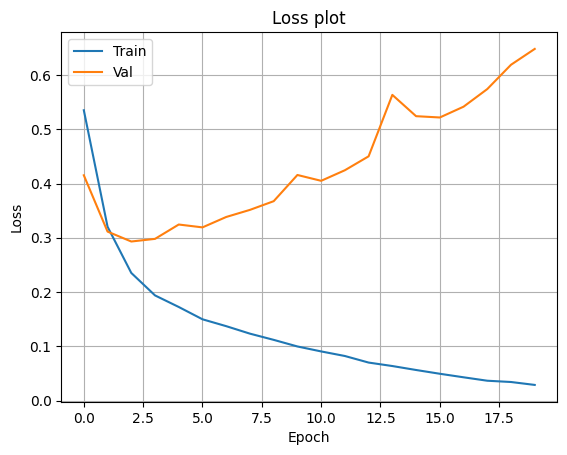

In [12]:
plt.figure
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title("Loss plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.grid()


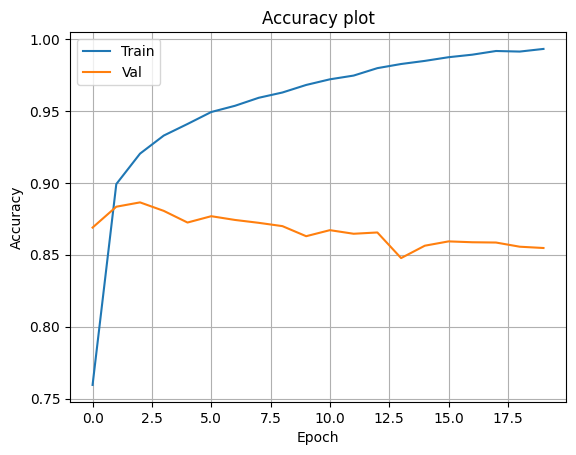

In [13]:
plt.figure
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title("Accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])
plt.grid()

In [14]:
test_loss, test_acc = network.evaluate(x_test, y_test)

print('test_acc:', test_acc)

469/469 [==============================] - 2s 4ms/step - loss: 0.6267 - accuracy: 0.8562
test_acc: 0.8561999797821045


In [15]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [16]:
callbacks = myCallback()

network.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
771/782 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9857
Reached 90% accuracy so cancelling training!
782/782 [==============================] - 3s 4ms/step - loss: 0.0433 - accuracy: 0.9856


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# alternatively from scikeras.wrappers import KerasClassifier

def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))
    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

<ipython-input-17-3c64ea5ed225>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/3
521/521 [==============================] - 3s 4ms/step - loss: 0.3450 - accuracy: 0.8565
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2069 - accuracy: 0.9245
Epoch 3/3
261/261 [==============================] - 1s 5ms/step - loss: 0.3125 - accuracy: 0.8834
Epoch 1/3
521/521 [==============================] - 3s 4ms/step - loss: 0.3551 - accuracy: 0.8549
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2057 - accuracy: 0.9248
Epoch 3/3
261/261 [==============================] - 2s 5ms/step - loss: 0.3025 - accuracy: 0.8885
Epoch 1/3
521/521 [==============================] - 5s 4ms/step - loss: 0.3539 - accuracy: 0.8522
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2103 - accuracy: 0.9190
Epoch 3/3
261/261 [==============================] - 1s 3ms/step - loss: 0.3085 - accuracy: 0.8896


In [ ]:
# !pip install scikeras[tensorflow]